<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/New%20Attempts%201/Copy_of_VGg_19_(Preprocessed_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

In [3]:
from tensorflow.keras.layers import MaxPooling2D

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.regularizers import l2

In [6]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

In [9]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [10]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Images in our dataset are gray-scale

base_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# include_top = False actually drops first and last layer of model
# My first layer should be 224 * 224 (Image dimension)
# My last year will have 4 classes according to dataset

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Unfreeze the last 4 layers
for layer in base_model.layers[-6:]:
    layer.trainable = True

In [13]:
layer_name = 'block5_pool'
selected_layer_output = base_model.get_layer(layer_name).output

# Create a new model using the layers up to 'block3_pool'
model = Model(inputs=base_model.input, outputs=selected_layer_output)

# Now you can add your custom layers on top of the new base model
# x = Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu", kernel_regularizer=l2(0.01))(model.output)
# x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(model.output)
# x = Dropout(0.5)(x)
# x = Dense(500, activation="relu")(x)
x = Dense(32, activation="relu")(x)
x = Dense(16, activation="relu")(x)
prediction = Dense(4, activation='softmax')(x)

# Create the final model
final_model = Model(inputs=model.input, outputs=prediction)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# our layers - you can add more if you want
# x = Flatten()(base_model.output)
# x = Dropout(0.4)(x)
# x = Dense(500, activation="relu")(x)
# prediction = Dense(4, activation='softmax')(x)

# # create a model object
# model = Model(inputs=base_model.input, outputs=prediction)

In [14]:
# view the structure of the model
final_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,827,828 (79.45 MB)

 Trainable params: 10,242,676 (39.07 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [15]:
for i, layer in enumerate(final_model.layers):
    print(i, layer.name, layer.trainable)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
22 flatten True
23 dense True
24 dense_1 True
25 dense_2 True


In [ ]:
# model=Sequential()
# model.add(base_model)
# model.add(Dropout(0.4))
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dropout(0.4))
# model.add(Dense(500,activation="relu"))
# model.add(Dense(4,activation="softmax"))  # 4 Neurons in the Output Layer
# model.summary()

ValueError: Undefined shapes are not supported.

In [16]:
# tell the model what cost and optimization method to use
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')


Found 4571 images belonging to 4 classes.


In [19]:
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 1141 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute

tf.keras.backend.clear_session()
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel.keras',
                                                monitor='accuracy', verbose=1,
                                                mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="max", restore_best_weights=True, patience=7)
callbacks_list = [checkpoint,early]

history = final_model.fit(training_set, epochs=15, callbacks=callbacks_list, validation_data = validation_set)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3228 - loss: 1.4910
Epoch 1: accuracy improved from -inf to 0.42529, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 1620s 11s/step - accuracy: 0.3235 - loss: 1.4893 - val_accuracy: 0.5153 - val_loss: 1.9099
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5975 - loss: 0.9385
Epoch 2: accuracy improved from 0.42529 to 0.62984, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 636ms/step - accuracy: 0.5978 - loss: 0.9378 - val_accuracy: 0.5995 - val_loss: 0.9859
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7348 - loss: 0.6258
Epoch 3: accuracy improved from 0.62984 to 0.78539, saving model to /content/drive/MyDrive/Colab Notebooks/Models/vgg19_3channel.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 661ms/step - accuracy: 0.7351 - loss: 0.6253 - val_accuracy: 0.7073 - val

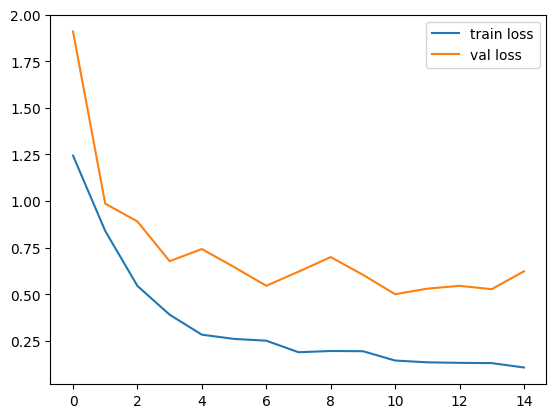

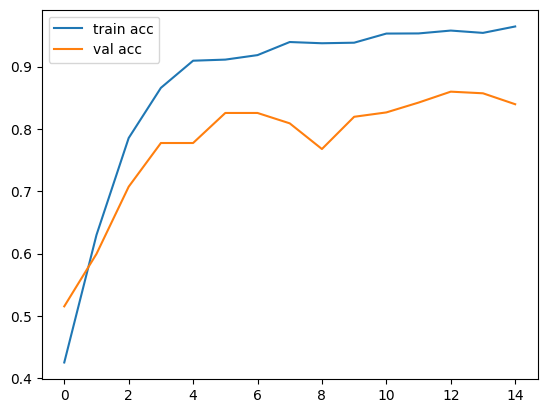

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(test_set)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 458s 11s/step - accuracy: 0.9131 - loss: 0.3752
Test Loss: 0.3373633027076721
Test Accuracy: 0.9145690202713013


# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
def get_labels_and_predictions(generator, model):
    true_labels = []
    predictions = []

    # Iterate over the generator
    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        y_pred = model.predict(x_batch)

        true_labels.extend(np.argmax(y_batch, axis=1))  # Assuming y_batch is one-hot encoded
        predictions.extend(np.argmax(y_pred, axis=1))

    return np.array(true_labels), np.array(predictions)


In [26]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [27]:
# Get true labels and predictions for the training set
true_labels_train, predictions_train = get_labels_and_predictions(training_set, final_model)

# Get true labels and predictions for the test set
true_labels_test, predictions_test = get_labels_and_predictions(test_set, final_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

In [28]:
# Compute the confusion matrices
cm_train = confusion_matrix(true_labels_train, predictions_train)
cm_test = confusion_matrix(true_labels_test, predictions_test)

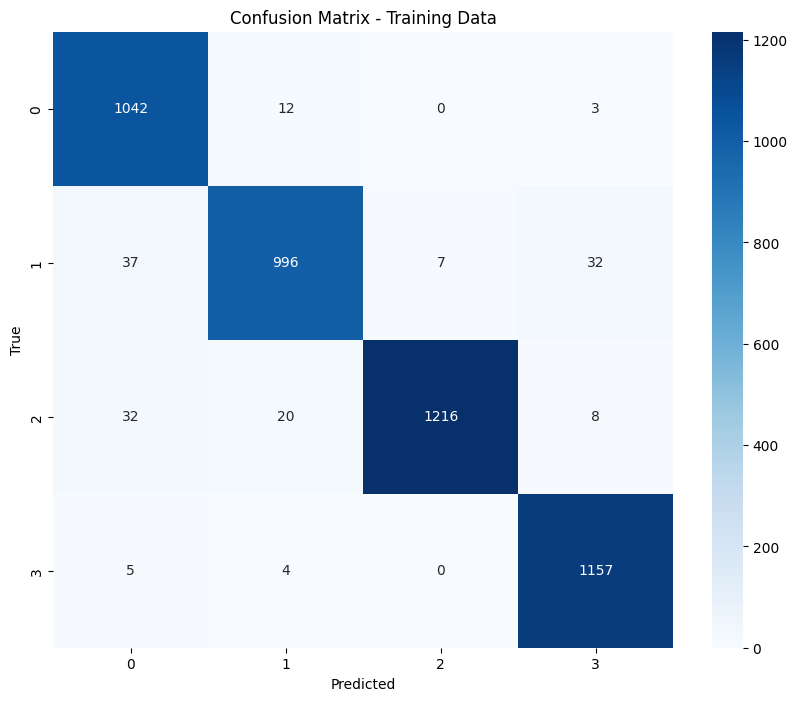

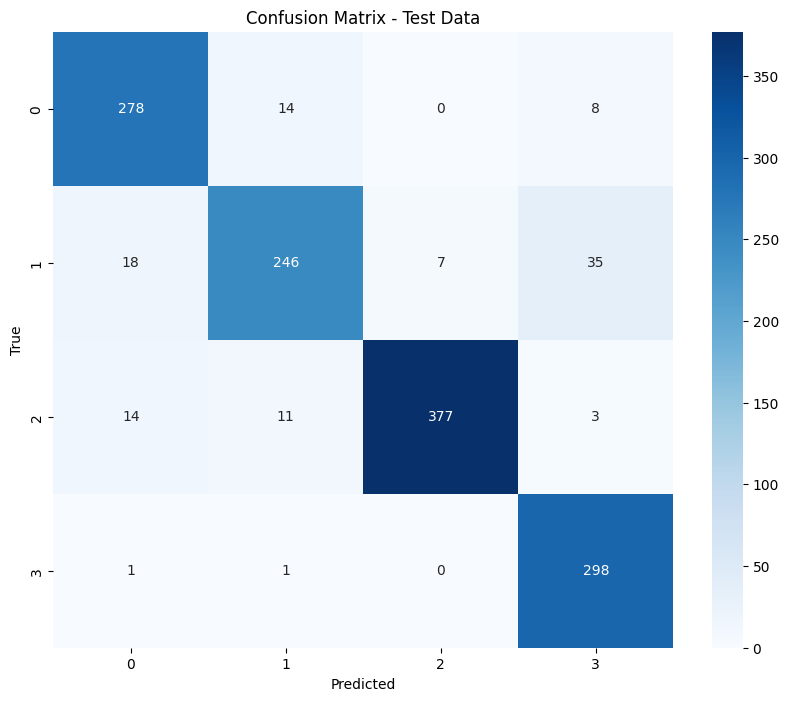

In [29]:
# Plot the confusion matrices
plot_confusion_matrix(cm_train, title='Confusion Matrix - Training Data')
plot_confusion_matrix(cm_test, title='Confusion Matrix - Test Data')

# Precision, Recall, F1-score

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
# For training data
precision_train = precision_score(true_labels_train, predictions_train, average='weighted')
recall_train = recall_score(true_labels_train, predictions_train, average='weighted')
f1_train = f1_score(true_labels_train, predictions_train, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_train}')

# For test data
precision_test = precision_score(true_labels_test, predictions_test, average='weighted')
recall_test = recall_score(true_labels_test, predictions_test, average='weighted')
f1_test = f1_score(true_labels_test, predictions_test, average='weighted')

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

Training Precision: 0.9657474991170314
Training Recall: 0.964996718442354
Training F1 Score: 0.9649544390410002
Test Precision: 0.9171762860431577
Test Recall: 0.9145690312738368
Test F1 Score: 0.9139127767633677


In [32]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19_preprocessed.h5')

In [ ]:
model.save('model_vgg19_preprocessed.keras')
